

* Dataset Setup
Setting up the dataset will be much like what was done before last week and the week before that, but I'll still go over what I plan on doing.
* Importing packages like numpy, pandas, tensorflow, and keras.
  Keras will be used for providing the MNIST dataset whereas tensorflow will be the backend for running the model.
* Splitting the axes into their respective train & test sets.
* Displaying the classes of numbers within the MNIST for reference.
* Reshaping, changing, and normalizing the split datasets for the model.

** Loading, splitting, seeing, and preparing.
First I'll load everything in along with setting a seed to a random state which is declared as the object 'rng': I'm not sure what this might be, so I'll come back to this later if its occurrence arises again. (*?*)

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from keras.datasets import mnist
from keras.utils import to_categorical

seed = 128
rng = np.random.RandomState(seed)


* let's now load the mnist dataset and split its axes into their respective training & testing sets.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)



and now taking a look at the numbers within the X_train set,

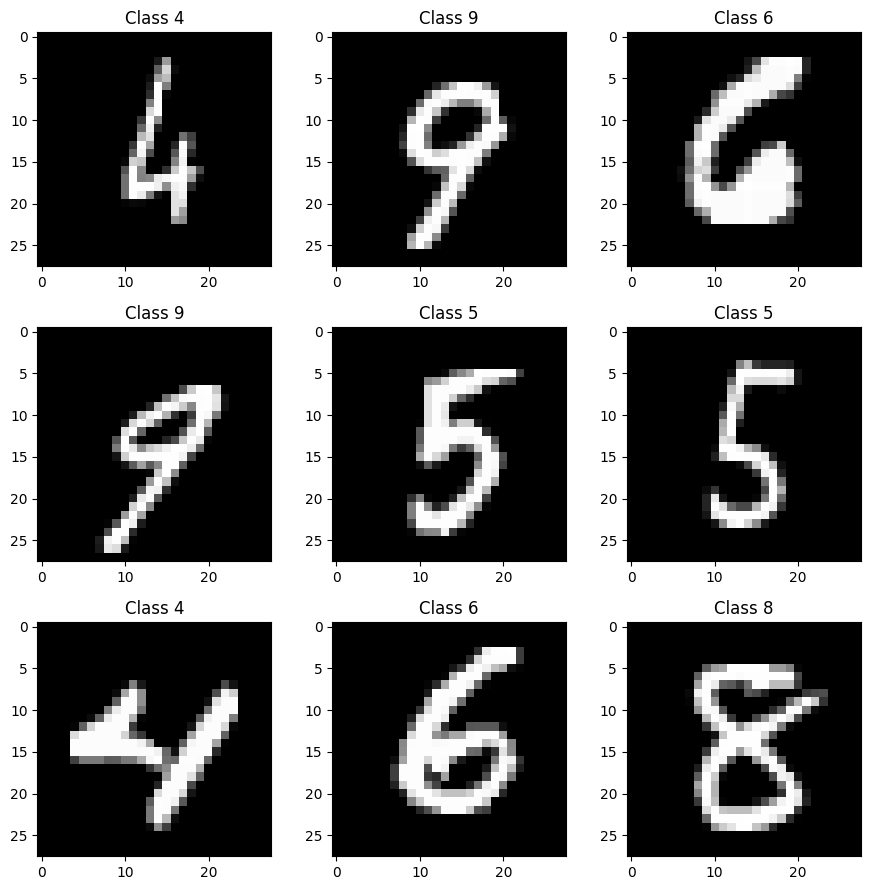

In [5]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='grey', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()


 with it now loaded, split, and having some visual evidence of what we want in sight, I can now begin to change the X_train & test's matrix forms into vectors; the object types of such datasets into floating point numbers, and normalize each value of each pixel relative to the entire vector.

I'm having some trouble with the object 'random' being used here. What's strange is that this same object is used within the template notebook but doesn't seem to have an issue there. I've found the issue; it was the lack of importing the module 'random' to use such a function/method: though, I'm not sure why it wasn't an issue in the template notebook.

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 225

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)




* The printing of the shape of the X_train & X_test seems to imply that it has been re-converted back into matrices. Further on, it can be seen that the Y-axes sets are converted to categorical values defined as the number of unique numbers as classes.

* Model Creation
At this point with the data prepared, I can start creating the model. The model that will be created is a dense, sequential neural network with five hidden layers and eight in total counting the input & output layers. I'll talk a bit more about this network after I've created it as it isn't clear initially what sort of net is being used for this sequential modeling.

In [7]:
from keras.models import Sequential
from keras.layers import Dense

input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 10
batch_size = 128

model = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dense(hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
    Dense(hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
    Dense(hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
    Dense(hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),

Dense(output_num_units, input_dim=hidden5_num_units, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d=model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

/home/nate/venvs/rl/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-14 21:18:18.323338: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9309 - loss: 0.2260 - val_accuracy: 0.9686 - val_loss: 0.0991
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9714 - loss: 0.0952 - val_accuracy: 0.9642 - val_loss: 0.1251
Epoch 3/10
 29/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9786 - loss: 0.0712

KeyboardInterrupt: 


* Based on the next layer taking the input of the prior which somewhat exposes its computational graph, it would seem it may be considered to be a recurrent neural network, just a very simple one that is. There are other hyperparameters to take note of here like its output layer, its compilation, and fitting to the data that I may touch on later.

** After running the model, there is some disparity between the train & test accuracy of the model.
This difference might be able to be further closed by methods of regularization and dropout further on.

Why might the values be bad to begin with (*?*)

- Average Training: 98%
- Average Validation: 97%

* Regularization Experiment

There are two types of regularization that will be done, L1 & L2: but what is regularization and why might it help to close the gap between the accuracy of the model? Looking into Goodfellow's book, it's stated that regularization is any sort of modification that's done to a learning algorithm in order to decrease its generalization error while not affecting the training error; in this context, it would be better to ask why such a thing would be important. This would also imply that what I'm seeking to do here is to decrease the distance between the generalization error and the training error, while not affecting the training error at all: why would that be desired?

To answer this question, I think I would have to explore what is the generalization error and training error, and how it relates to the role of the two sets being used.

** Performing L2 Regularization

In [ ]:
from keras import regularizers

model = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu',
          kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
          kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
          kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden4_num_units, input_dim=hidden3_num_units, activation='relu', 
          kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
          kernel_regularizer=regularizers.l2(0.0001)),

Dense(output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

L2_regularized_model=model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))


*** Inital values
- Average Training: 97% 
- Average Validation: 97% 



** Preforming L1 Regularization

In [ ]:
from keras import regularizers

model = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu',
          kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
          kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
          kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden4_num_units, input_dim=hidden3_num_units, activation='relu', 
          kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
          kernel_regularizer=regularizers.l1(0.0001)),

Dense(output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

L2_regularized_model=model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

*** Initial Values
- Average Training: 0.97
- Average Validation: 0.97

*** Using the following lambda values: 0.001, 0.01, 0.1, 1, 10
What's meant by lambda values anyways? I remember it to mean something about function abstraction, so I would be looking for something like that but having a term for its use here. Finding some meaning within Deep Learning, I find that in their use it's for controlling the strength of preference for smaller weights; this was done for showing how I could make a learning algorithm have preference for one solution over another (like that of a function). In this context then, it would be a similar use of such a symbol but for whatever the influence method is here, which would be L1 & L2; so what are they?

Looking within the slides, lambda seems to be the 'regularization factor' within the expression of the cost function, which I'm not sure how it connects. Within the code, I would assume the change in lambda would be the only parameter passed to the regularizer.l1 function.

**** $L^{2}$
I've found is also called the Ridge Regression, and it's talked about within Deep Learning but more in terms of a kind of normalization and for the weights to be smaller then it.

- 0.01
  - Training Average: 0.93
  - Validation Average: 0.94
- 1
  - Training Avg: 0.11
  - Validation Avg: 0.11


**** $L^{1}$
This is also called the Lasso Regression.

- 0.01
  - Training Average: 0.11
  - Validation Average: 0.11
- 1: I actually get an error for this number type.

* Dropout Experiment
So what is Dropout besides what I'm doing! (ba dum tss): but seriously, what is it? Dropout is a method for dealing with situations where you want to test a bunch of neural nets with different qualities on the same sets of data; if you have one that you'd like to split up to try, you can do so using Dropout. An interesting way of thinking about it is making each edge ( the connecting lines ) a product of zero, making it so each vertex ( the neurons ) except the output vertex is removed once, allowing for each state of the network to be used & tested.

In this context,

In [ ]:
from keras import regularizers
from keras.layers import Dropout

model = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
          Dropout(0.25),
    Dense(hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
          Dropout(0.25),
    Dense(hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
          Dropout(0.25),
    Dense(hidden4_num_units, input_dim=hidden3_num_units, activation='relu'), 
          Dropout(0.25),
    Dense(hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
          Dropout(0.25),

Dense(output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

dropout_layer_model=model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_testc)


* I seem to be having an issue with my syntax here, being that my closing parenthesis doesn't match the opening on line 12. What's strange is that I don't see anything wrong with the syntax or rather a mismatch of proper closing & opening parentheses. Looking into it, I found two issues actually
* I hadn't imported the Dropout module from keras.layers
* Dropout layers are added as a distinct item rather than a parameter in the neuron row itself.

** Initial Values
Outside of spikes within the val_accuracy, the values for each are about 96% for the training accuracy and 97% for the validation accuracy, which is still a somewhat large difference.

*** Using the following dropout rates 0.35 and 0.50

- 0.35:
  - Training Average: 0.97
  - Validation Average: 0.97
- 0.50:
  - Training Average: 0.97
  - Validation Average: 0.97

* Reflection
There are two questions asked specifically about lambda and dropout, so I'll do those separately.
** How did the lambda changes affect the bias/variance tradeoff?
So to answer this question I would have to first figure out why at first it would be asking me about bias and/or variance and the trade-off between them in the context of recording the averages of the training & validation model performance: and if this were to be true, then it would be implied that such changes to them are related to such things within the model. Lambda within the cost function would then be that connection: but how? Well, to answer that question, I would have to ask what is the cost function and how it relates to lambda.

The cost function, though sometimes specifically denoted, can generally be called the objective function which is actually a function that I would want to either minimize or maximize depending on the optimization problem I'm dealing with. So in this context, I would be best rather to find why such a concept is called a Cost Function here; this seems to be rather an optimization for classification, so in some sense linear which means this 'cost function' is more for parameter optimization to minimize errors.

So how does bias and variance fit into this? I recall that Bias was the magnitude of difference between an expected value of a parameter and its true value, and variance seems to represent the change in an estimated parameter as a function of the data sample, possibly changing through independent re-sampling.

So to bring it back a bit, I find that the bias would be changed directly in the cost function by the change in lambda, or rather it's to say that the difference between the expected value of a parameter and its true value would be directly affected by the change in the numerator of the ratio used within the cost function. Variance wouldn't be directly affected, but rather its influence would be felt for the value of the bias (preferably one with a low variance affecting it).

** How did dropout influence overfitting and generalization?
Using Dropout seems to have the best effect by not approaching a state of overfitting but still staying high in its average accuracy in both training and validation.
** Which method (regularization vs. dropout) seemed most useful, and why?
Dropout seemed to produce the most stable results through its change of value rather than either form of regularization (Lasso or Ridge). I think to answer why would require me to understand how the variance and bias of parameters are connected to the cost function through lambda. Lambda as a variable is used in the regularization method $L^2$ & $L^1$, where its value controls the strength of the penalty on the weights within the model; this is done so as to stop a model from overfitting by favouring a route of weights heavily weighted and thus producing such a cost function.

This to me might be the reason why it didn't perform as well compared to dropout: the original cost function wasn't overfitting but nearly general. This might also explain why performing dropout didn't change the difference between the average accuracies.